In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from StockPredictor import Predictor,PredictorEntity
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("datasets\\TATAMOTORS.NS-FINAL.csv")
df = df[::-1]
predictor_entity = PredictorEntity(
    name="TATAMOTORS",
    epochs=270,
    lr=26,
    #activation='relu' lr 26
)

machine = Predictor(df,predictor_entity)


In [4]:
machine.compile()
machine.test_predict()

,y_test,y_pred,abs_error,percent_error
0,1240.949951,1252.352417,11.402466,0.918850
1,1260.599976,1268.537476,7.937500,0.629660
2,1257.300049,1265.559814,8.259765,0.656945
3,1271.400024,1280.489868,9.089844,0.714948
4,1282.699951,1290.211670,7.511719,0.585618
...,...,...,...,...
433,1633.800049,1565.336548,68.463501,4.190446
434,1629.599976,1551.479370,78.120606,4.793852
435,1639.400024,1571.759155,67.640869,4.125953
436,1687.400024,1609.991455,77.408569,4.587446


In [5]:
print(machine.metrics())


        "Max Absolute Error":85.17712419531244,
        "Max Percent Error":7.630610848856381,
        "Average Absolute Error":13.383519547954124,
        "Average Percent Error":1.0103339561249736,
        


In [6]:
#machine.save_model()

In [7]:
res = machine.res

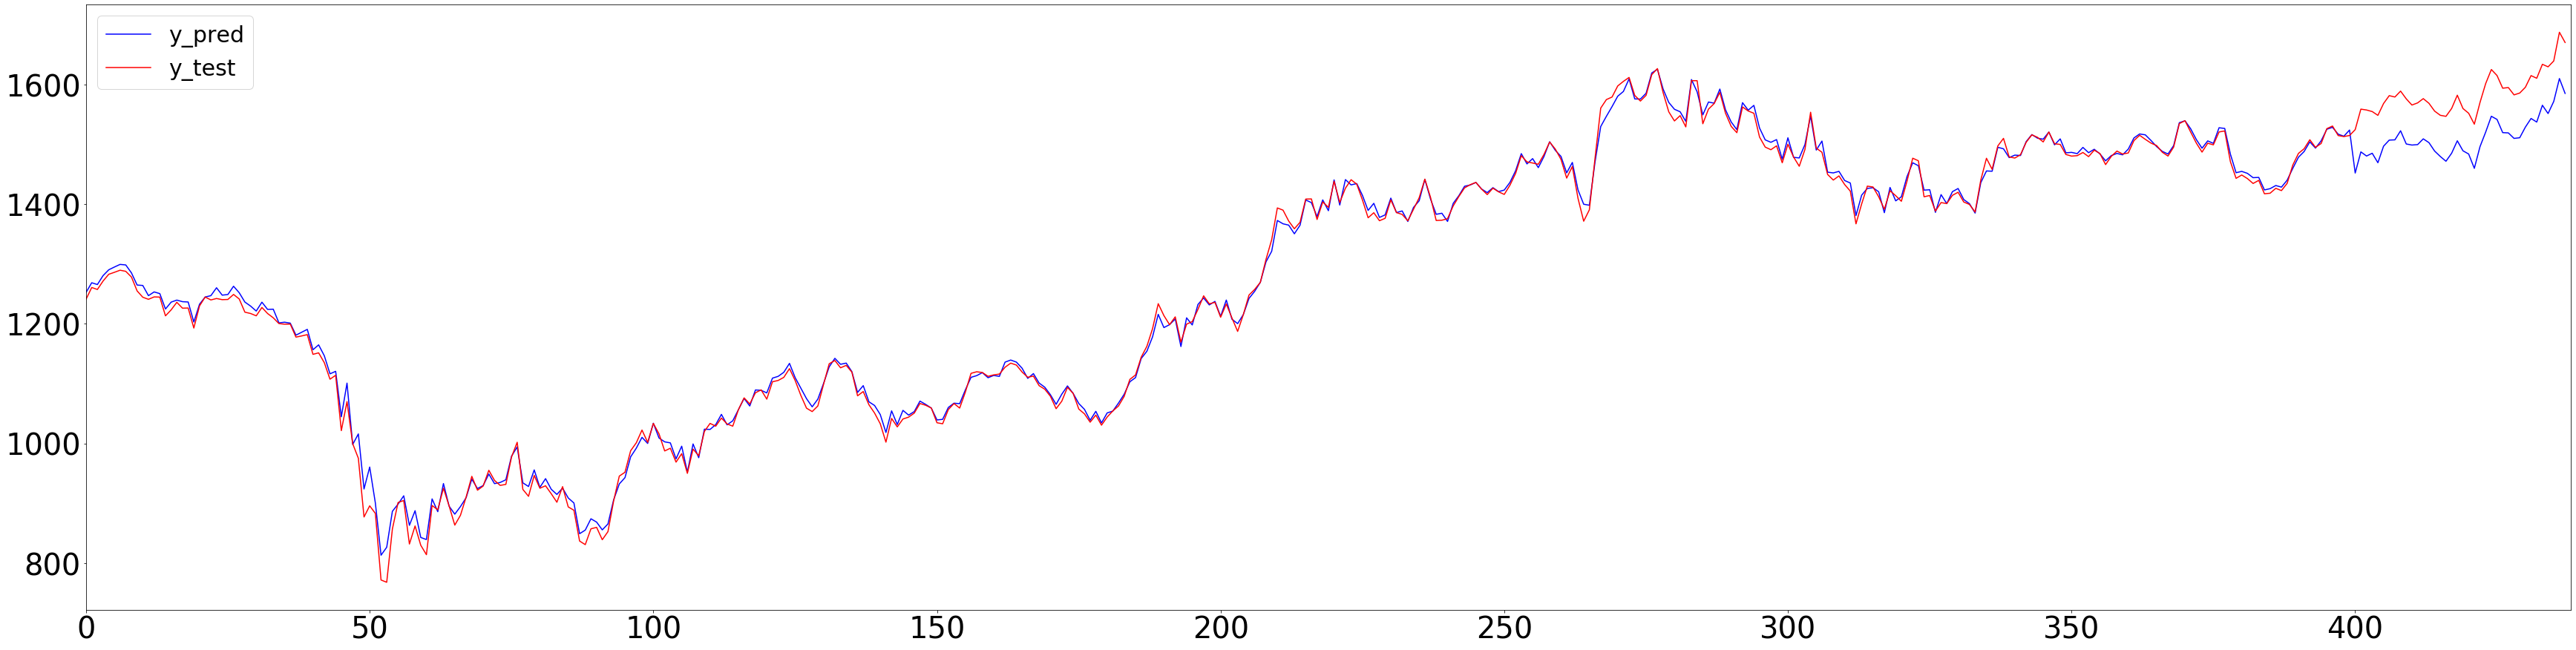

In [8]:
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res['y_pred'],label='y_pred',color='blue')
plt.plot(res['y_test'],label='y_test',color='red')
plt.xlim(xmin=0,xmax=len(res['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

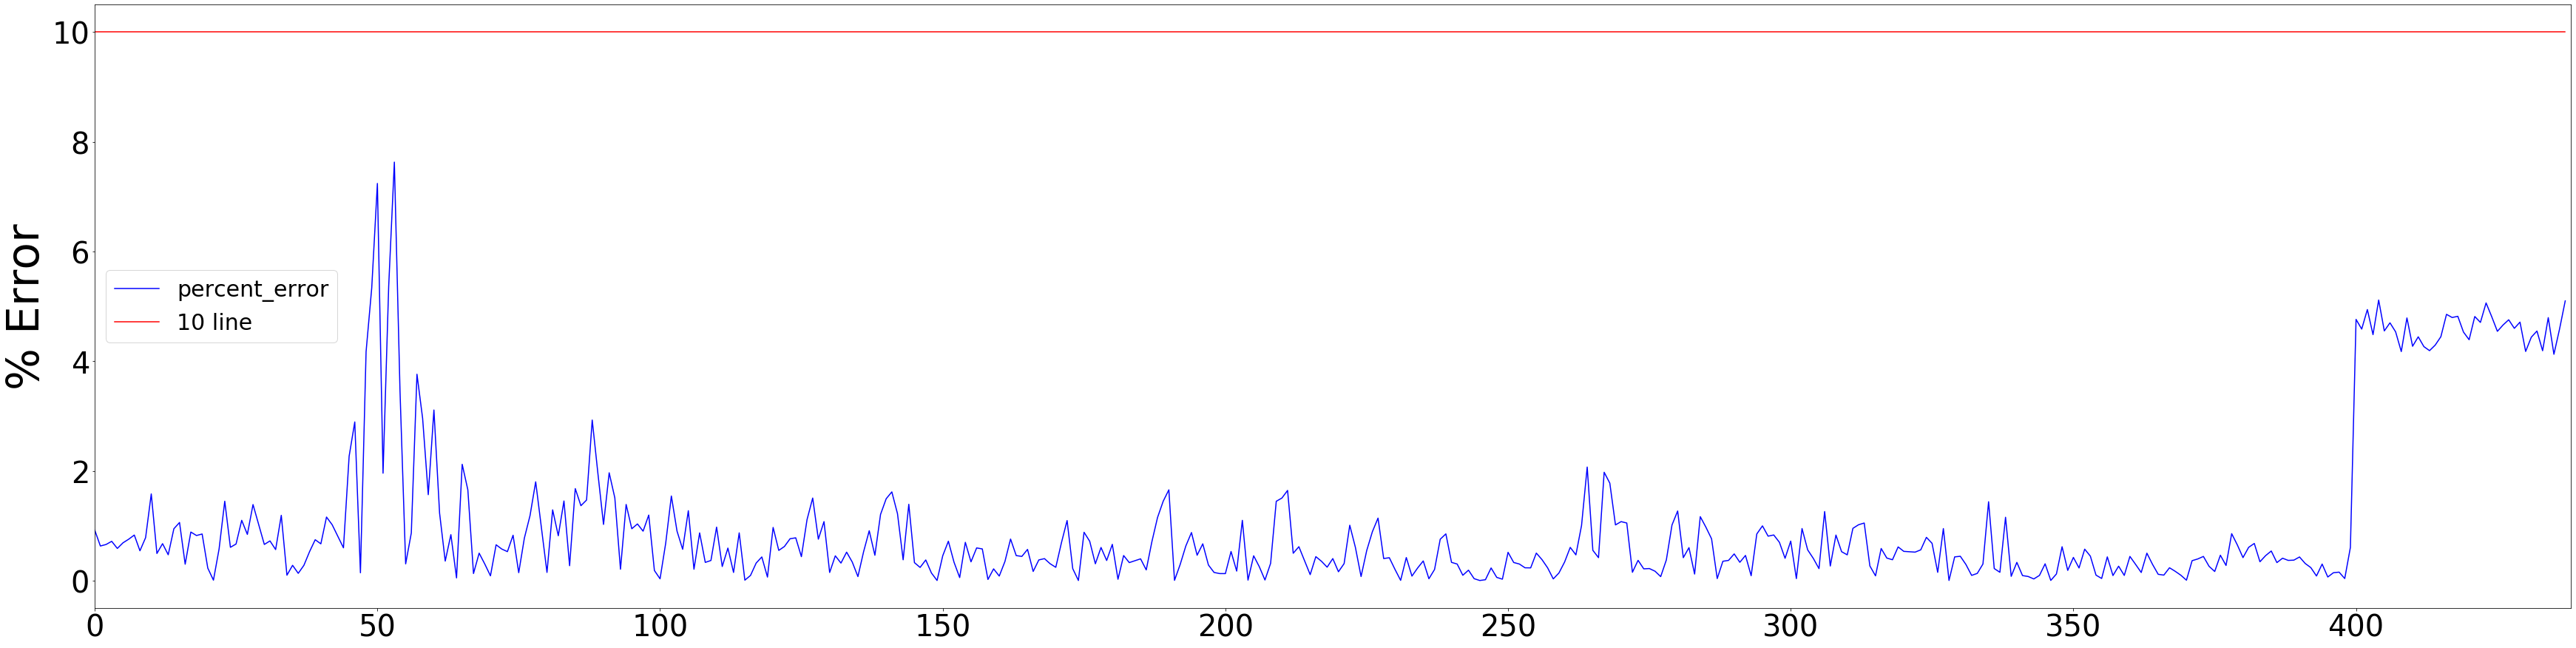

In [9]:
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res['percent_error'],label='percent_error',color='blue')
plt.plot([10 for i in range(len(res['percent_error']))],label='10 line',color='red')
plt.ylabel("% Error")
plt.xlim(xmin=0,xmax=len(res['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

# FINAL SCRIPT

In [10]:
from StockPredictor import Predictor,PredictorEntity
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
FILENAME = "2.4342976250345134.h5"
df = pd.read_csv("datasets\\INFY.NS-FINAL.csv")
df = df[::-1]
predictor_entity = PredictorEntity(name="INFY")
machine = Predictor(df,predictor_entity)
machine.load_model(filepath=f"models\\INFY\\{FILENAME}")

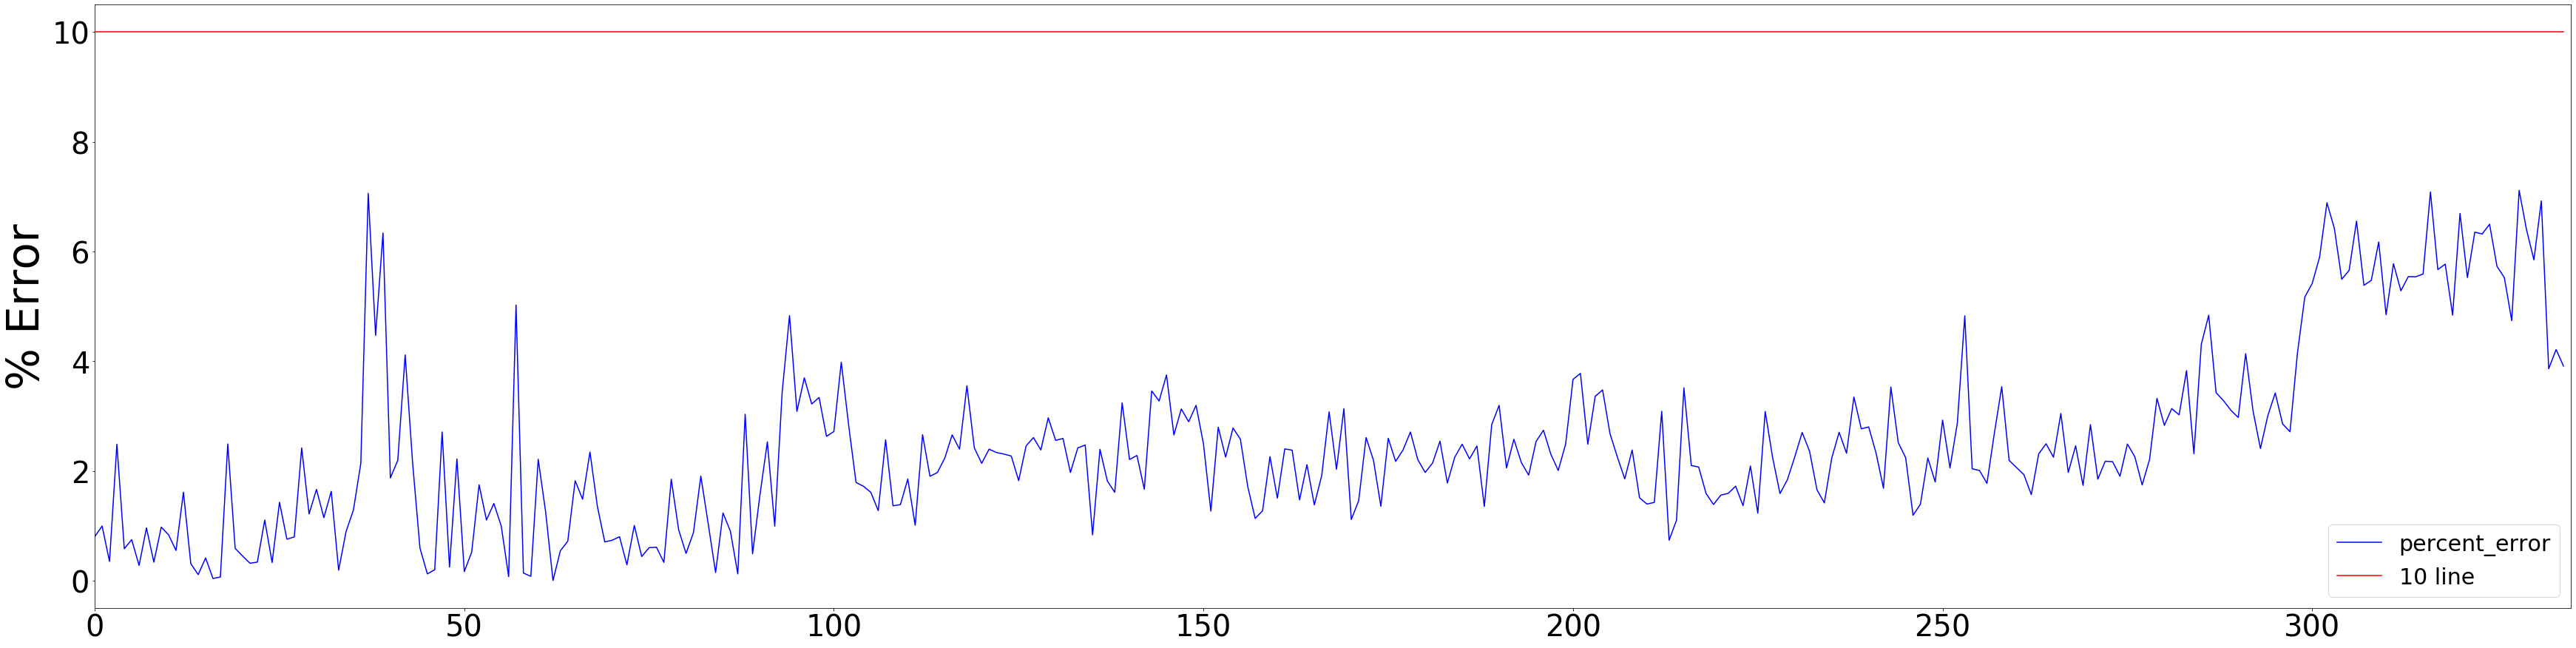

In [12]:
res2 = machine.res
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res2['percent_error'],label='percent_error',color='blue')
plt.plot([10 for i in range(len(res2['percent_error']))],label='10 line',color='red')
plt.ylabel("% Error")
plt.xlim(xmin=0,xmax=len(res2['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

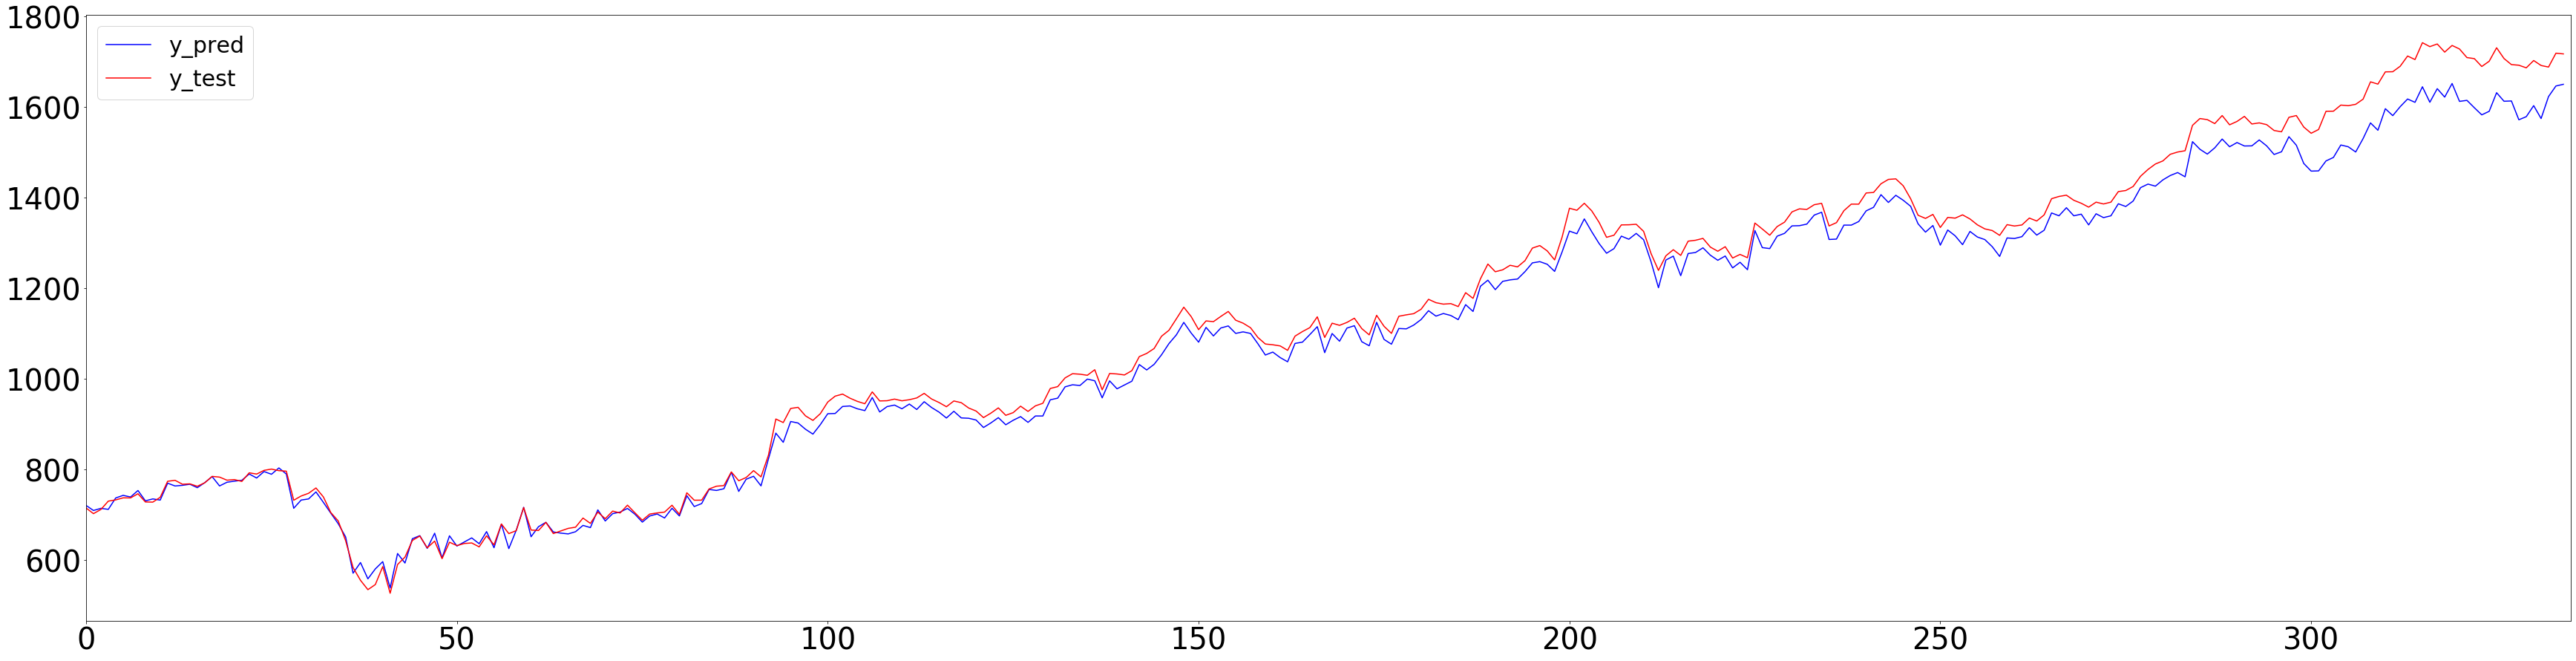

In [13]:
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res2['y_pred'],label='y_pred',color='blue')
plt.plot(res2['y_test'],label='y_test',color='red')
plt.xlim(xmin=0,xmax=len(res2['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

In [14]:
res4 = machine.res.copy()
res4['y_pred'] = res4['y_pred'] - (res4['abs_error'].mean()*199/res4['abs_error'].max())
res4['abs_error'] = abs(res4['y_test'] - res4['y_pred'])
res4['percent_error'] = res4['abs_error'] * 100 / res4['y_test']

In [15]:
res4

,y_test,y_pred,abs_error,percent_error
0,714.549988,670.369019,44.180969,6.183048
1,702.099976,659.181091,42.918885,6.112931
2,711.299988,663.882629,47.417359,6.666295
3,729.700012,661.664551,68.035461,9.323758
4,732.450012,686.794739,45.655273,6.233227
...,...,...,...,...
330,1702.250000,1552.813110,149.436890,8.778786
331,1691.300049,1524.313599,166.986450,9.873260
332,1687.849976,1572.766724,115.083252,6.818334
333,1718.449951,1596.177002,122.272949,7.115305


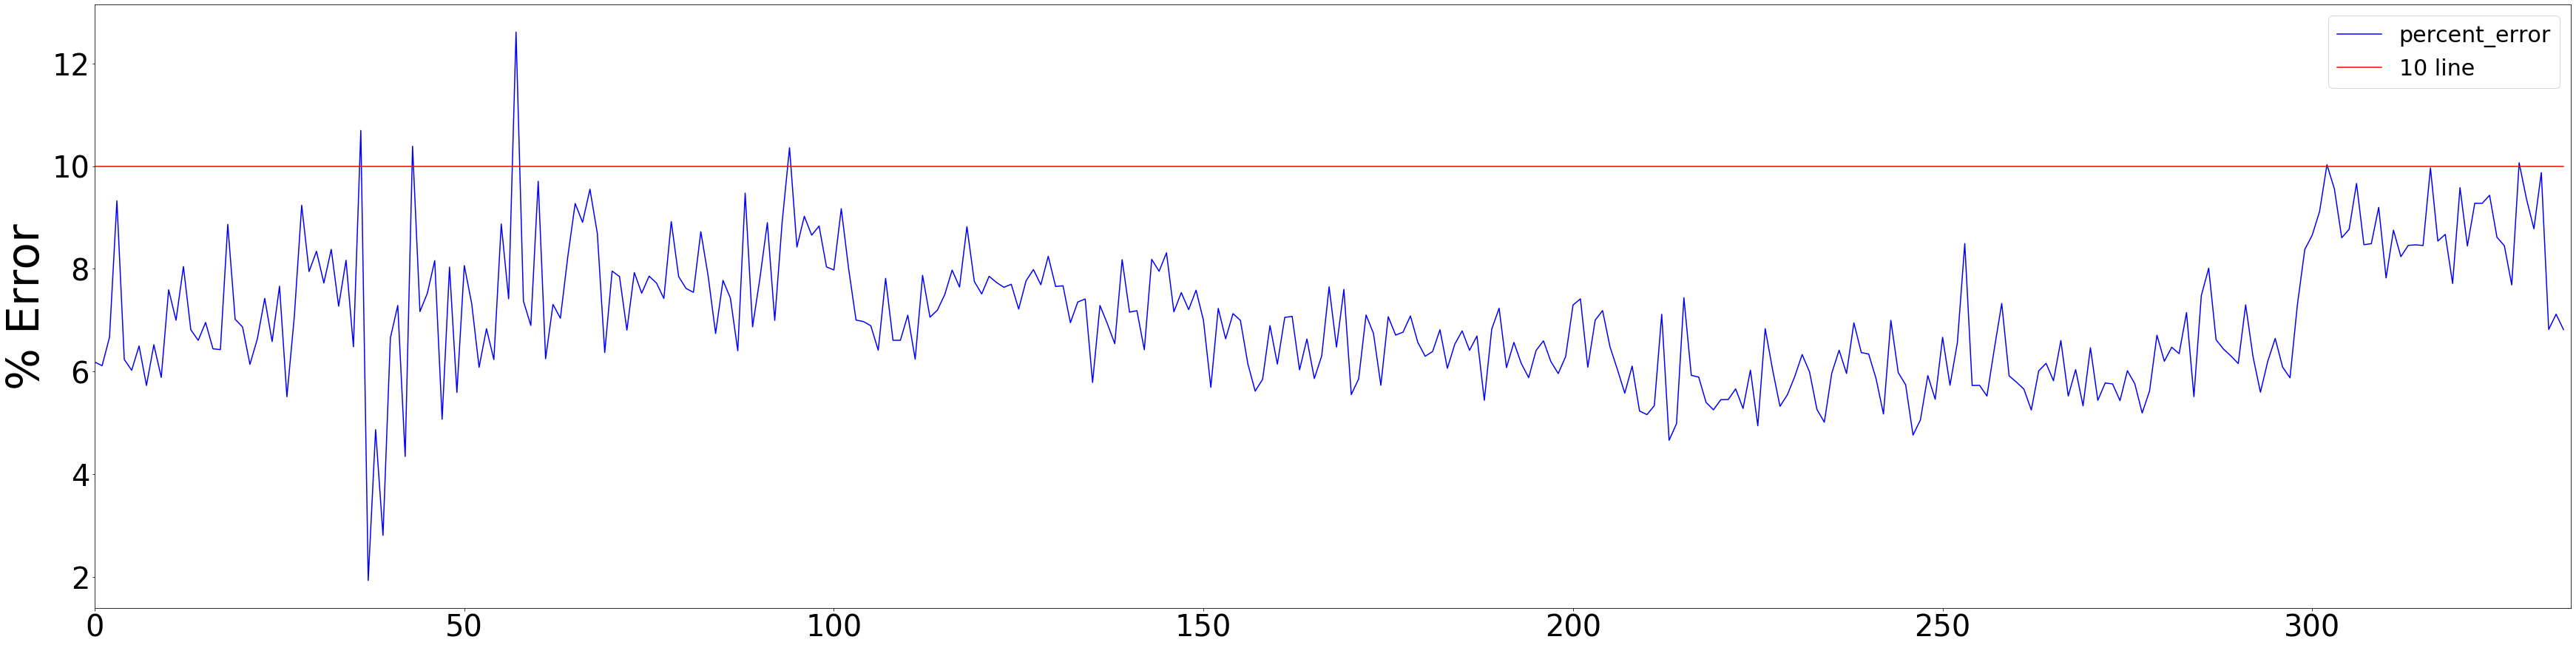

In [16]:
plt.rcParams["figure.figsize"] = [60, 15]
plt.rcParams["font.size"] = 40
plt.rcParams["axes.labelsize"] = 60
plt.plot(res4['percent_error'],label='percent_error',color='blue')
plt.plot([10 for i in range(len(res4['percent_error']))],label='10 line',color='red')
plt.ylabel("% Error")
plt.xlim(xmin=0,xmax=len(res2['y_test']))
plt.legend(prop={'size':30})
plt.show()
plt.rcParams.update({
    "figure.figsize":[6.4,4.8],
    "font.size":10,
    "axes.labelsize":'medium',
})

In [17]:
res4['percent_error'].max()

12.608128695502469

In [18]:
x_test = machine.x_test

In [19]:
df = machine.data.dataframe()
LEN = len(df)*3//4
x = df.drop("CLOSE",axis=1)
x = x.head(x.shape[0]-1)
LEN = len(df)*3//4
x_test = x.iloc[LEN:,:]

In [20]:
x_test = x_test.reset_index(drop=True)

In [21]:
res3 = pd.concat([x_test,res4],axis=1)
res3

,DATE,OPEN,HIGH,LOW,ADJ CLOSE,VOLUME,COMP_NEWS,NEG_NEWS,NEU_NEWS,POS_NEWS,...,BBANDSUPPER20,BBANDSLOWER20,WILLR14,MACD,MACDSIGNAL,MACDHIST,y_test,y_pred,abs_error,percent_error
0,1.575484e+09,706.450012,715.900024,703.799988,684.241089,4814422,1.0000,0.026,0.842,0.131,...,741.985858,639.874121,-17.796610,-8.542388,-1.58866,-6.953728,714.549988,670.369019,44.180969,6.183048
1,1.575916e+09,713.000000,718.500000,710.000000,683.953979,4457939,1.0000,0.026,0.842,0.132,...,739.698278,650.081703,-18.813519,-7.030487,-1.76978,-5.260707,702.099976,659.181091,42.918885,6.112931
2,1.576089e+09,718.500000,720.700012,699.549988,672.037109,11112042,1.0000,0.026,0.843,0.131,...,733.901398,662.343579,-61.016949,-6.758994,-1.58129,-5.177704,711.299988,663.882629,47.417359,6.666295
3,1.576175e+09,700.349976,712.900024,700.349976,680.843140,10302412,1.0000,0.026,0.843,0.131,...,728.895001,673.594977,-29.830468,-5.735356,-1.21180,-4.523556,729.700012,661.664551,68.035461,9.323758
4,1.576521e+09,719.700012,731.250000,715.000000,698.455322,10525565,1.0000,0.026,0.844,0.130,...,727.871732,681.528250,-0.000000,-3.400192,-0.78015,-2.620042,732.450012,686.794739,45.655273,6.233227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,1.631558e+09,1695.949951,1695.949951,1678.599976,1671.338013,4945167,0.9927,0.012,0.917,0.071,...,1749.934803,1667.245202,-100.000000,22.664539,-0.28666,22.951199,1702.250000,1552.813110,149.436890,8.778786
331,1.631731e+09,1715.199951,1719.250000,1691.449951,1687.296509,3246568,0.9910,0.012,0.919,0.068,...,1748.627858,1671.052146,-69.391667,21.159986,0.91098,20.249006,1691.300049,1524.313599,166.986450,9.873260
332,1.631817e+09,1697.000000,1718.000000,1684.449951,1676.442749,7454864,0.9968,0.017,0.893,0.089,...,1747.342831,1673.712173,-89.574853,18.866564,1.87473,16.991834,1687.849976,1572.766724,115.083252,6.818334
333,1.632076e+09,1685.000000,1707.699951,1677.949951,1673.022949,5660743,0.9968,0.017,0.893,0.089,...,1747.472437,1673.407568,-96.558803,16.579501,2.65433,13.925171,1718.449951,1596.177002,122.272949,7.115305


In [22]:
res3.columns = [g.lower() for g in res3.columns]

In [23]:
res3.to_json("results\\INFY\\output.json",orient='records')

In [24]:
drop = ['comp_social','neg_social', 'neu_social', 'pos_social', 'comp_news', 'pos_news',
       'neu_news', 'neg_news', 'rsi3', 'rsi6', 'rsi14', 'rsi50', 'rsi100',
       'mom1', 'mom3', 'ema6', 'ema12', 'sma3', 'rocr3', 'rocr12', 'cci12',
       'cci20', 'bbandsmiddle20', 'bbandsupper20', 'bbandslower20', 'willr14',
       'macd', 'macdsignal', 'macdhist']
res3 = res3.drop([x for x in res3.columns if x in drop],axis=1)
res3


,date,open,high,low,adj close,volume,y_test,y_pred,abs_error,percent_error
0,1.575484e+09,706.450012,715.900024,703.799988,684.241089,4814422,714.549988,670.369019,44.180969,6.183048
1,1.575916e+09,713.000000,718.500000,710.000000,683.953979,4457939,702.099976,659.181091,42.918885,6.112931
2,1.576089e+09,718.500000,720.700012,699.549988,672.037109,11112042,711.299988,663.882629,47.417359,6.666295
3,1.576175e+09,700.349976,712.900024,700.349976,680.843140,10302412,729.700012,661.664551,68.035461,9.323758
4,1.576521e+09,719.700012,731.250000,715.000000,698.455322,10525565,732.450012,686.794739,45.655273,6.233227
...,...,...,...,...,...,...,...,...,...,...
330,1.631558e+09,1695.949951,1695.949951,1678.599976,1671.338013,4945167,1702.250000,1552.813110,149.436890,8.778786
331,1.631731e+09,1715.199951,1719.250000,1691.449951,1687.296509,3246568,1691.300049,1524.313599,166.986450,9.873260
332,1.631817e+09,1697.000000,1718.000000,1684.449951,1676.442749,7454864,1687.849976,1572.766724,115.083252,6.818334
333,1.632076e+09,1685.000000,1707.699951,1677.949951,1673.022949,5660743,1718.449951,1596.177002,122.272949,7.115305


In [25]:
res4 = machine.res.copy()
x_test = machine.x_test
df = machine.data.dataframe()
LEN = len(df)*3//4
x = df.drop("CLOSE",axis=1)
x = x.head(x.shape[0]-1)
LEN = len(df)*3//4
x_test = x.iloc[LEN:,:]
x_test = x_test.reset_index(drop=True)
res3 = pd.concat([x_test,res4],axis=1)
res3.columns = [g.lower() for g in res3.columns]
drop = ['comp_social','neg_social', 'neu_social', 'pos_social', 'comp_news', 'pos_news',
       'neu_news', 'neg_news', 'rsi3', 'rsi6', 'rsi14', 'rsi50', 'rsi100',
       'mom1', 'mom3', 'ema6', 'ema12', 'sma3', 'rocr3', 'rocr12', 'cci12',
       'cci20', 'bbandsmiddle20', 'bbandsupper20', 'bbandslower20', 'willr14',
       'macd', 'macdsignal', 'macdhist']
res3 = res3.drop([x for x in res3.columns if x in drop],axis=1)
res3.to_json("results\\TATAMOTORS\\output.json",orient='records')


In [26]:
res3

,date,open,high,low,adj close,volume,y_test,y_pred,abs_error,percent_error
0,1.575484e+09,706.450012,715.900024,703.799988,684.241089,4814422,714.549988,720.262817,5.712829,0.799500
1,1.575916e+09,713.000000,718.500000,710.000000,683.953979,4457939,702.099976,709.074890,6.974914,0.993436
2,1.576089e+09,718.500000,720.700012,699.549988,672.037109,11112042,711.299988,713.776428,2.476440,0.348157
3,1.576175e+09,700.349976,712.900024,700.349976,680.843140,10302412,729.700012,711.558350,18.141662,2.486181
4,1.576521e+09,719.700012,731.250000,715.000000,698.455322,10525565,732.450012,736.688538,4.238526,0.578678
...,...,...,...,...,...,...,...,...,...,...
330,1.631558e+09,1695.949951,1695.949951,1678.599976,1671.338013,4945167,1702.250000,1602.706909,99.543091,5.847736
331,1.631731e+09,1715.199951,1719.250000,1691.449951,1687.296509,3246568,1691.300049,1574.207397,117.092652,6.923233
332,1.631817e+09,1697.000000,1718.000000,1684.449951,1676.442749,7454864,1687.849976,1622.660522,65.189454,3.862278
333,1.632076e+09,1685.000000,1707.699951,1677.949951,1673.022949,5660743,1718.449951,1646.070801,72.379150,4.211886


In [27]:
import datetime
datetime.datetime.fromtimestamp(res3.iloc[[len(res3)-1]]['date'])

datetime.datetime(2021, 9, 21, 0, 0)